# Principal Component Analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

## Eigenfaces



 We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [34]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

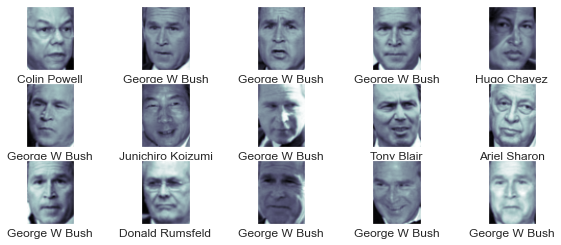

In [35]:
fig, ax = plt.subplots(3, 5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [36]:
# pca without scaling
from sklearn.decomposition import PCA

pca = PCA(150, svd_solver='randomized').fit(faces.data)     # just select 150 features

In [37]:
# pca with scaling
from sklearn.decomposition import PCA

scaler = StandardScaler()
faces.data_scaled = scaler.fit_transform(faces.data)
pca_scaled = PCA(150, svd_solver='randomized').fit(faces.data_scaled)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

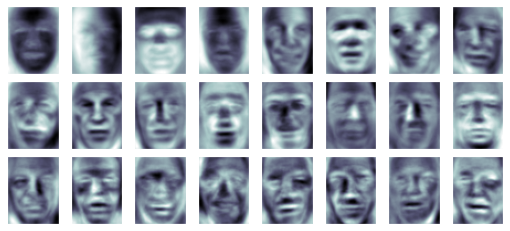

In [38]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_scaled.components_[i].reshape(62, 47), cmap='bone')

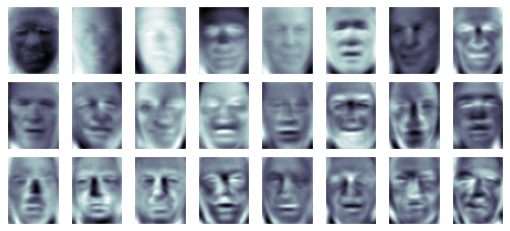

In [39]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

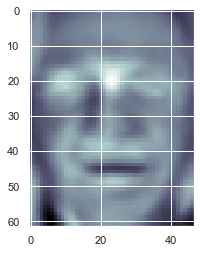

In [40]:
# Make and plot a new face by selecting some components and useing your own coefficients 
plt.imshow(( 5 * pca.components_[2] + ((-1) * pca.components_[10]) + 2 * pca.components_[3]
            + 7 * pca.components_[21]).reshape(62,47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

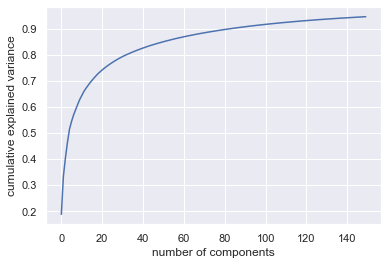

In [41]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

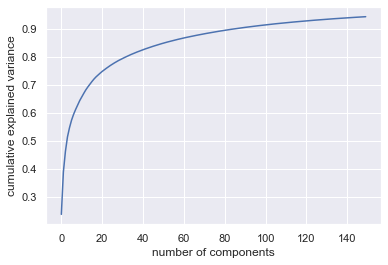

In [42]:
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

In [43]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

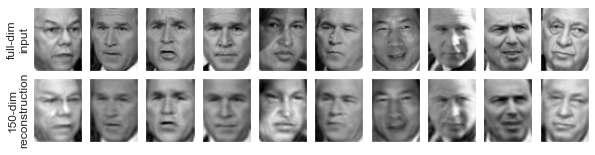

In [44]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

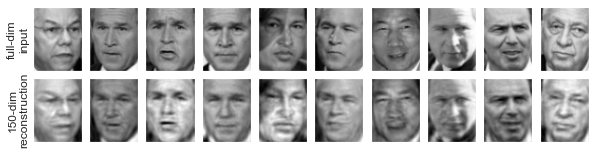

In [45]:
pca_scaled = PCA(150, svd_solver='randomized').fit(faces.data_scaled)
components_scaled = pca_scaled.transform(faces.data)
projected_scaled = pca_scaled.inverse_transform(components_scaled)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected_scaled[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### Change the above plot so that we can see three rows of faces: input, transformed with PCA without scaling, and with scaling.

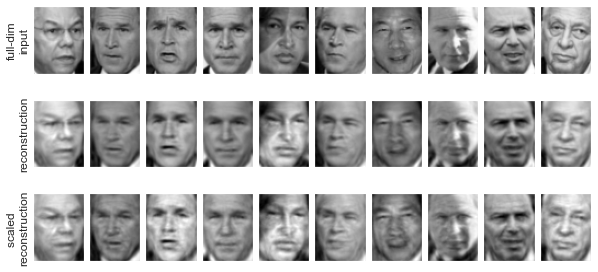

In [46]:
fig, ax = plt.subplots(3, 10, figsize=(10,5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62,47), cmap='binary_r')
    ax[2, i].imshow(projected_scaled[i].reshape(62,47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('reconstruction')
ax[2, 0].set_ylabel('scaled \nreconstruction');

The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.

With this visualization we can guess that the PCA feature selection would be successful for image classification: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

### Training Phase

- Train SVM with linear kernel, LogisticRegression, KNN, Naibe Bayes and Decision tree classifiers on this dataset. With and without dimensionality reduction.
- What is the accuracy obtained on the test set?
- Show the classification report
- Show the confusion matrix 

In [48]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Xtrain_s, Xtest_s, ytrain_s, ytest_s = train_test_split(faces.data_scaled, faces.target,
                                                random_state=42)

In [49]:
pca_model = PCA(150, svd_solver='randomized').fit(faces.data_scaled)
Xtrain_pca = pca.transform(Xtrain_s)
Xtest_pca = pca.transform(Xtest_s)

In [50]:
Xtrain.shape

(1011, 2914)

In [51]:
Xtrain_pca.shape

(1011, 150)

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [53]:
svc = SVC(kernel='linear')
lr = LogisticRegression(solver='saga', multi_class='auto', max_iter=550, fit_intercept=True)
knn = KNeighborsClassifier(n_neighbors=3)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_depth=80)

models = ['svc', 'lr', 'knn', 'nb', 'dt']

********** svc with PCA **********
svc with PCA: Accuracy 0.8071216617210683

svc with PCA confusion matrix: 
[[ 10   1   3   0   1   0   0   0]
 [  2  57   0   6   1   0   0   2]
 [  1   1  23   5   0   0   0   1]
 [  1   8   2 107   1   2   1   4]
 [  2   0   1   1  17   0   1   1]
 [  2   1   0   0   1  13   0   3]
 [  0   0   0   0   0   0  12   0]
 [  1   1   0   3   3   1   0  33]]

svc with PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.67      0.59        15
     Colin Powell       0.83      0.84      0.83        68
  Donald Rumsfeld       0.79      0.74      0.77        31
    George W Bush       0.88      0.85      0.86       126
Gerhard Schroeder       0.71      0.74      0.72        23
      Hugo Chavez       0.81      0.65      0.72        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.75      0.79      0.77        42

         accuracy                     

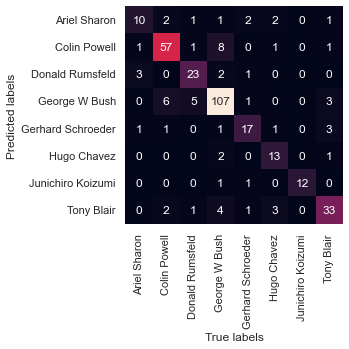

-------------------------------------------------------------------------
********** svc without PCA **********
svc without PCA: Accuracy 0.8189910979228486

svc without PCA confusion matrix: 
[[ 10   1   3   0   1   0   0   0]
 [  1  58   1   6   1   0   0   1]
 [  1   2  23   4   0   0   0   1]
 [  0   9   3 106   3   1   1   3]
 [  1   0   0   1  18   0   1   2]
 [  1   1   0   0   2  13   1   2]
 [  0   0   0   0   0   0  12   0]
 [  1   0   2   1   2   0   0  36]]

svc without PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.67      0.67        15
     Colin Powell       0.82      0.85      0.83        68
  Donald Rumsfeld       0.72      0.74      0.73        31
    George W Bush       0.90      0.84      0.87       126
Gerhard Schroeder       0.67      0.78      0.72        23
      Hugo Chavez       0.93      0.65      0.76        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony 

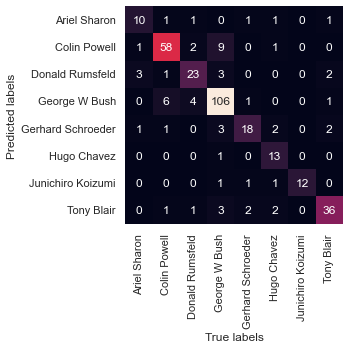

********** lr with PCA **********


/Users/mamadoualphabalde/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mamadoualphabalde/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mamadoualphabalde/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mamadoualphabalde/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMet

lr with PCA: Accuracy 0.4332344213649852

lr with PCA confusion matrix: 
[[  0   5   0  10   0   0   0   0]
 [  0  23   0  45   0   0   0   0]
 [  0   4   0  27   0   0   0   0]
 [  0   3   0 123   0   0   0   0]
 [  0   1   0  22   0   0   0   0]
 [  0   0   0  20   0   0   0   0]
 [  0   0   0  12   0   0   0   0]
 [  0   5   0  37   0   0   0   0]]

lr with PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        15
     Colin Powell       0.56      0.34      0.42        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.42      0.98      0.58       126
Gerhard Schroeder       0.00      0.00      0.00        23
      Hugo Chavez       0.00      0.00      0.00        20
Junichiro Koizumi       0.00      0.00      0.00        12
       Tony Blair       0.00      0.00      0.00        42

         accuracy                           0.43       337
        macro avg

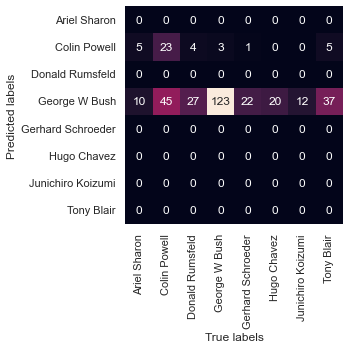

-------------------------------------------------------------------------
********** lr without PCA **********


/Users/mamadoualphabalde/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


lr without PCA: Accuracy 0.8308605341246291

lr without PCA confusion matrix: 
[[ 11   0   3   0   1   0   0   0]
 [  1  59   2   4   0   0   0   2]
 [  1   1  23   4   0   0   0   2]
 [  0   7   1 108   3   2   1   4]
 [  0   0   0   1  20   0   1   1]
 [  1   1   0   1   3  12   0   2]
 [  0   0   0   0   0   0  12   0]
 [  1   0   1   5   0   0   0  35]]

lr without PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.87      0.87      0.87        68
  Donald Rumsfeld       0.77      0.74      0.75        31
    George W Bush       0.88      0.86      0.87       126
Gerhard Schroeder       0.74      0.87      0.80        23
      Hugo Chavez       0.86      0.60      0.71        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.76      0.83      0.80        42

         accuracy                           0.83       337
        

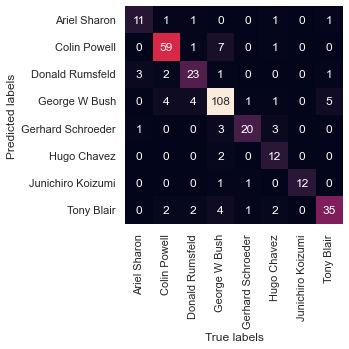

********** knn with PCA **********
knn with PCA: Accuracy 0.5489614243323442

knn with PCA confusion matrix: 
[[ 9  2  0  2  0  1  0  1]
 [ 6 50  2  5  1  0  0  4]
 [ 4  8 12  6  0  0  0  1]
 [11 18  9 84  1  1  0  2]
 [ 2  3  2  9  7  0  0  0]
 [ 3  3  2  5  1  3  0  3]
 [ 0  1  0  3  0  0  8  0]
 [ 5  3  5 16  1  0  0 12]]

knn with PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.23      0.60      0.33        15
     Colin Powell       0.57      0.74      0.64        68
  Donald Rumsfeld       0.38      0.39      0.38        31
    George W Bush       0.65      0.67      0.66       126
Gerhard Schroeder       0.64      0.30      0.41        23
      Hugo Chavez       0.60      0.15      0.24        20
Junichiro Koizumi       1.00      0.67      0.80        12
       Tony Blair       0.52      0.29      0.37        42

         accuracy                           0.55       337
        macro avg       0.57      0.47     

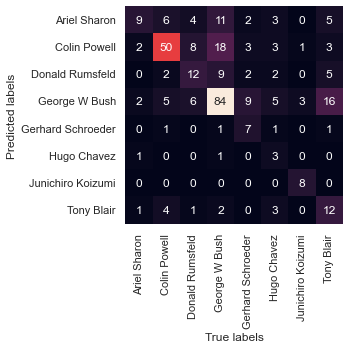

-------------------------------------------------------------------------
********** knn without PCA **********
knn without PCA: Accuracy 0.5074183976261127

knn without PCA confusion matrix: 
[[ 8  4  0  2  1  0  0  0]
 [11 43  1 10  1  0  0  2]
 [ 5  8  9  8  0  0  0  1]
 [ 7 20  8 86  1  2  0  2]
 [ 2  3  5  6  5  0  0  2]
 [ 3  4  1 10  1  1  0  0]
 [ 0  0  1  3  0  1  7  0]
 [ 2  6  5 16  0  1  0 12]]

knn without PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.21      0.53      0.30        15
     Colin Powell       0.49      0.63      0.55        68
  Donald Rumsfeld       0.30      0.29      0.30        31
    George W Bush       0.61      0.68      0.64       126
Gerhard Schroeder       0.56      0.22      0.31        23
      Hugo Chavez       0.20      0.05      0.08        20
Junichiro Koizumi       1.00      0.58      0.74        12
       Tony Blair       0.63      0.29      0.39        42

         accurac

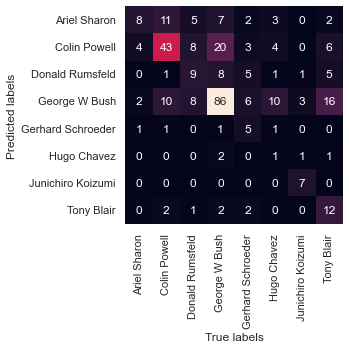

********** nb with PCA **********
nb with PCA: Accuracy 0.655786350148368

nb with PCA confusion matrix: 
[[10  2  1  2  0  0  0  0]
 [ 5 45  1 15  0  0  0  2]
 [ 1  3 19  5  1  0  0  2]
 [ 6 12  1 94  3  7  0  3]
 [ 0  1  0  6 15  1  0  0]
 [ 2  2  0  6  2  8  0  0]
 [ 2  2  0  0  0  0  8  0]
 [ 2  7  0  7  0  4  0 22]]

nb with PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.36      0.67      0.47        15
     Colin Powell       0.61      0.66      0.63        68
  Donald Rumsfeld       0.86      0.61      0.72        31
    George W Bush       0.70      0.75      0.72       126
Gerhard Schroeder       0.71      0.65      0.68        23
      Hugo Chavez       0.40      0.40      0.40        20
Junichiro Koizumi       1.00      0.67      0.80        12
       Tony Blair       0.76      0.52      0.62        42

         accuracy                           0.66       337
        macro avg       0.67      0.62      0.63

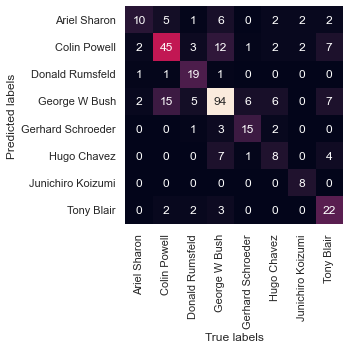

-------------------------------------------------------------------------
********** nb without PCA **********
nb without PCA: Accuracy 0.456973293768546

nb without PCA confusion matrix: 
[[ 6  3  3  1  1  1  0  0]
 [ 8 34  3  5  0  6  4  8]
 [ 5  6 16  0  2  0  0  2]
 [ 7 21  9 48  4 18  9 10]
 [ 2  0  0  0  6  5  1  9]
 [ 1  1  0  1  1 13  1  2]
 [ 0  0  0  0  0  1 11  0]
 [ 6  3  0  3  2  7  1 20]]

nb without PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.17      0.40      0.24        15
     Colin Powell       0.50      0.50      0.50        68
  Donald Rumsfeld       0.52      0.52      0.52        31
    George W Bush       0.83      0.38      0.52       126
Gerhard Schroeder       0.38      0.26      0.31        23
      Hugo Chavez       0.25      0.65      0.37        20
Junichiro Koizumi       0.41      0.92      0.56        12
       Tony Blair       0.39      0.48      0.43        42

         accuracy    

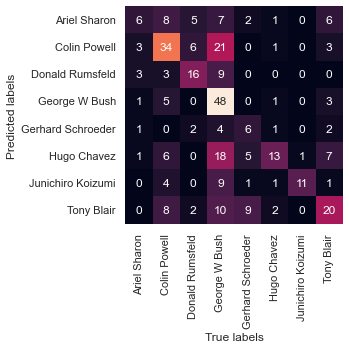

********** dt with PCA **********
dt with PCA: Accuracy 0.37388724035608306

dt with PCA confusion matrix: 
[[ 3  3  2  2  1  0  1  3]
 [ 4 24  3 24  3  4  2  4]
 [ 1  1  7 11  4  2  1  4]
 [11 11  6 71 10  4  1 12]
 [ 0  3  2  6  7  1  1  3]
 [ 1  4  0  4  4  2  1  4]
 [ 2  0  0  3  1  0  6  0]
 [ 5  8  0 11  9  0  3  6]]

dt with PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.11      0.20      0.14        15
     Colin Powell       0.44      0.35      0.39        68
  Donald Rumsfeld       0.35      0.23      0.27        31
    George W Bush       0.54      0.56      0.55       126
Gerhard Schroeder       0.18      0.30      0.23        23
      Hugo Chavez       0.15      0.10      0.12        20
Junichiro Koizumi       0.38      0.50      0.43        12
       Tony Blair       0.17      0.14      0.15        42

         accuracy                           0.37       337
        macro avg       0.29      0.30      0.

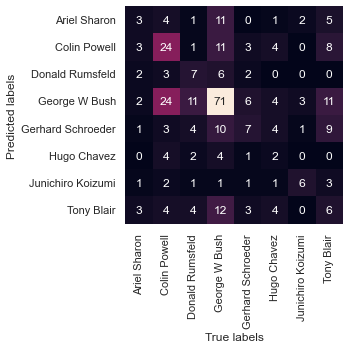

-------------------------------------------------------------------------
********** dt without PCA **********
dt without PCA: Accuracy 0.4124629080118694

dt without PCA confusion matrix: 
[[ 2  5  1  5  0  1  0  1]
 [ 7 35  6 11  2  2  4  1]
 [ 3  4 10  8  2  2  0  2]
 [ 6 15 16 66  3  3  3 14]
 [ 1  2  4  6  5  1  1  3]
 [ 1  3  2  2  2  7  2  1]
 [ 1  0  0  1  3  3  4  0]
 [ 2  2  0 18  6  1  3 10]]

dt without PCA classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.09      0.13      0.11        15
     Colin Powell       0.53      0.51      0.52        68
  Donald Rumsfeld       0.26      0.32      0.29        31
    George W Bush       0.56      0.52      0.54       126
Gerhard Schroeder       0.22      0.22      0.22        23
      Hugo Chavez       0.35      0.35      0.35        20
Junichiro Koizumi       0.24      0.33      0.28        12
       Tony Blair       0.31      0.24      0.27        42

         accuracy   

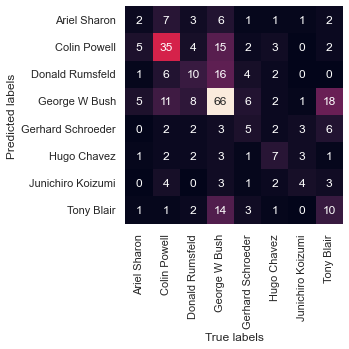

In [61]:
for i in range(len(models)):
    print('********** ' + models[i] + ' with PCA **********')
    eval(models[i]).fit(Xtrain_pca, ytrain_s)
    y_pred_pca = eval(models[i]).predict(Xtest_pca)
    print(models[i] + ' with PCA: Accuracy', eval(models[i]).score(Xtest_pca, ytest_s))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    print(confusion_matrix(ytest_s, y_pred_pca))
    print()
    print(models[i] + ' with PCA classification report: ')
    print(classification_report(ytest_s, y_pred_pca, target_names=faces.target_names))
    print()
    print(models[i] + ' with PCA confusion matrix: ')
    mat = confusion_matrix(ytest_s, y_pred_pca)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, 
                yticklabels=faces.target_names)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)
    
    print('-------------------------------------------------------------------------')
    
    print('********** ' + models[i] + ' without PCA **********')
    eval(models[i]).fit(Xtrain, ytrain)
    y_pred = eval(models[i]).predict(Xtest)
    print(models[i] + ' without PCA: Accuracy', eval(models[i]).score(Xtest, ytest))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    print(confusion_matrix(ytest, y_pred))
    print()
    print(models[i] + ' without PCA classification report: ')
    print(classification_report(ytest, y_pred, target_names=faces.target_names))
    print()
    print(models[i] + ' without PCA confusion matrix: ')
    mat = confusion_matrix(ytest, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, 
                yticklabels=faces.target_names)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')
    plt.show()
    del(mat)